# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(mouse_metadata, study_results, how='left',on='Mouse ID')
data_df.head

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
# Checking the number of mice.

num_mice = data_df['Mouse ID'].nunique()


In [85]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = data_df.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [32]:
# Optional: Get all the data for the duplicate mouse ID. 


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df =data_df.drop_duplicates(['Mouse ID'])
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [34]:
# Checking the number of mice in the clean DataFrame.
clean_data_df.duplicated(['Mouse ID']).sum()

0

## Summary Statistics

In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean =data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median =data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance =data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv =data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem =data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.
summary_df =pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM":sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [87]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#summary_df = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'stdv', 'sem'])
#Rename the columns for clarity
summary_df.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
# Display the summary DataFrame
print("Summary DataFrame:")
print(summary_df)

Summary DataFrame:
                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

In [91]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
datapoint_plot = data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
datapoint_plot

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

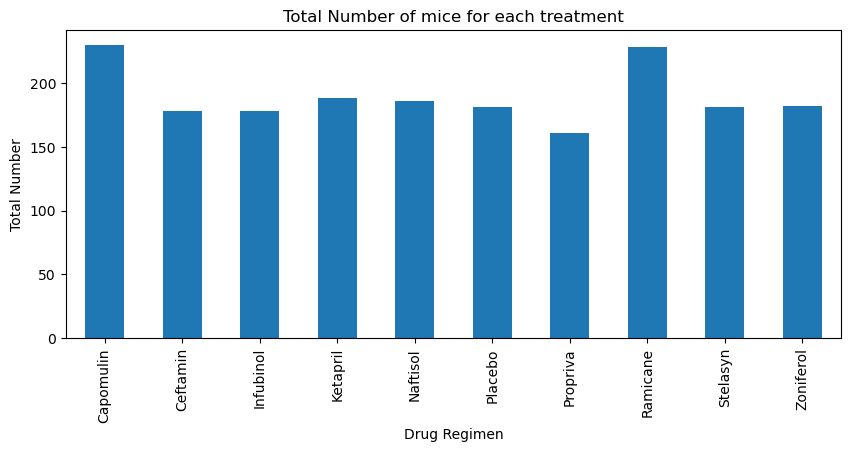

<Figure size 640x480 with 0 Axes>

In [92]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
datapoint_plot.plot(kind="bar",figsize=(10,4))
plt.title("Total Number of mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number")
plt.show()
plt.tight_layout()


In [93]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution =data_df.groupby(['Sex']).count()["Mouse ID"]
sex_distribution

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

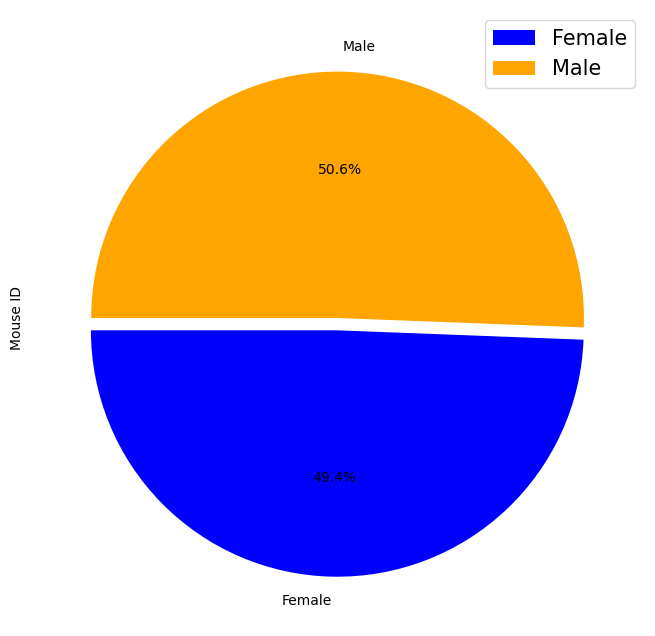

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors= ['blue','orange']
explode = (0.05,0)
panPie_plot = sex_distribution.plot.pie(y='Total Count',figsize=(8,8), colors = colors, startangle=180, explode =explode, autopct="%1.1f%%")
panPie_plot.legend(["Female", "Male"], prop={'size': 15})


## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint =data_df[data_df['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol","Ceftamin"])]
mouse_timepoint = mouse_timepoint.sort_values(["Timepoint"],ascending =True)
mouse_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_dataframe = mouse_timepoint.merge(data_df, on =('Mouse ID','Timepoint'), how ='left')
merge_dataframe



,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,Ramicane,Male,21,16,45.000000,0
1,q132,Infubinol,Female,1,30,0,45.000000,0,Infubinol,Female,1,30,45.000000,0
2,i738,Capomulin,Female,23,20,0,45.000000,0,Capomulin,Female,23,20,45.000000,0
3,a520,Ramicane,Male,13,21,0,45.000000,0,Ramicane,Male,13,21,45.000000,0
4,p438,Ceftamin,Female,11,26,0,45.000000,0,Ceftamin,Female,11,26,45.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,v923,Capomulin,Female,19,21,45,40.658124,2,Capomulin,Female,19,21,40.658124,2
810,m957,Capomulin,Female,3,19,45,33.329098,1,Capomulin,Female,3,19,33.329098,1
811,j119,Capomulin,Female,7,23,45,38.125164,1,Capomulin,Female,7,23,38.125164,1
812,s508,Ramicane,Male,1,17,45,30.276232,0,Ramicane,Male,1,17,30.276232,0


In [102]:
# Tumor volume at last timepoint
regimes_data = mouse_timepoint[["Drug Regimen","Mouse ID","Timepoint","Tumor Volume (mm3)"]]
regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [103]:
regimes_data.shape

(814, 4)

In [107]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = regimes_data["Drug Regimen"].unique()
treatments_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data =[]
for treatment in treatments_list:
    treatment_data = regimes_data.loc[regimes_data["Drug Regimen"]==treatment, "Tumor Volume (mm3)"].tolist()
    
# Selecting individual row by index
capomulin_data = data_df.loc[data_df["Drug Regimen"] == "Capomulin",:]
ramicane_data = data_df.loc[data_df["Drug Regimen"] == "Ramicane", :]
infubinol_data = data_df.loc[data_df["Drug Regimen"] == "Infubinol", :]
ceftamin_data = data_df.loc[data_df["Drug Regimen"] == "Ceftamin", :]
capomulin_data

#  Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_last = capomulin_data.groupby('Mouse ID').max()['Timepoint']
capomulin_last
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_vol
capomulin_merge = capomulin_vol.merge(data_df, on=("Mouse ID", "Timepoint"), how="left")
capomulin_merge


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tuvol = capomulin_merge['Tumor Volume (mm3)']
quartiles = tuvol.quantile([0.25,0.5,0.75])
capomulin_lowerq = quartiles[0.25]
capomulin_upperq = quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
print(f' IQR = {capomulin_iqr}')
print(f' Lower Quartile = {capomulin_lowerq}')
print(f' Upper Quartile = {capomulin_upperq}')
capomulin_lower_bound = capomulin_lowerq - 1.5*capomulin_iqr
capomulin_upper_bound = capomulin_upperq + 1.5*capomulin_iqr
print(f' Lower Bound: {capomulin_lower_bound}')
print(f' Upper Bound: {capomulin_upper_bound}')
capomulin_merge.describe()

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


 IQR = 7.781863460000004
 Lower Quartile = 32.37735684
 Upper Quartile = 40.1592203
 Lower Bound: 20.70456164999999
 Upper Bound: 51.83201549


,Timepoint,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
count,25.00000,25.000000,25.0000,25.000000,25.000000
mean,41.00000,14.040000,20.1200,36.667568,1.280000
std,10.10363,7.850053,2.8624,5.715188,0.979796
min,10.00000,1.000000,15.0000,23.343598,0.000000
25%,45.00000,7.000000,17.0000,32.377357,1.000000
50%,45.00000,17.000000,21.0000,38.125164,1.000000
75%,45.00000,21.000000,22.0000,40.159220,2.000000
max,45.00000,24.000000,25.0000,47.685963,3.000000


In [109]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

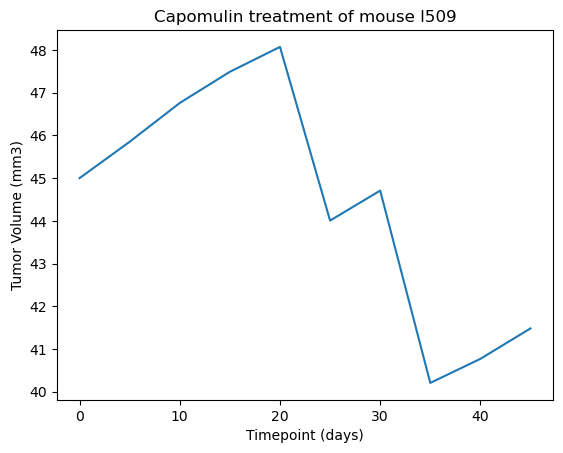

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


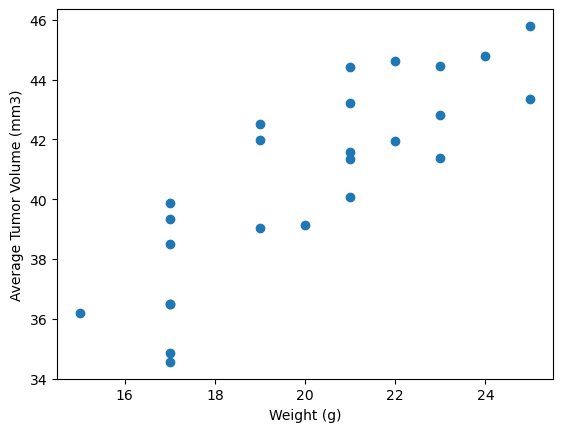

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


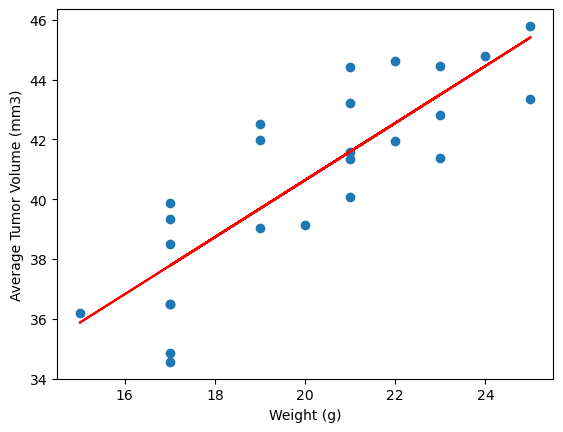

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
